# qbic-pipelines/root-tissue-analysis
# Pipeline Report

**Description:** pH determination analysis

----------------------------------------------------------

In [77]:
import itertools
import os
import sys

import click
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import numpy as np
from rich import print, traceback
from statannotations.Annotator import Annotator
from IPython.display import display, Markdown
%matplotlib inline
import tifffile as tiff
import matplotlib.patches as mpatches

## to keep the report clean
import warnings
warnings.filterwarnings('ignore')

In [56]:
ratio_path = "ratios.tsv"
img_path = "brightfields/"
pred_path = "predictions/"
ratio_img_path = "ratios/"
ome_output_path = "ome_out/"

## Statistics per Tissue Zone
------------------------------------

### Meristematic Zone

Test Description     Test Name Statistic Symbol  \
0  Welch's t-test independent samples  t-test_welch                t   
1  Welch's t-test independent samples  t-test_welch                t   

      Value   p-value Corrected Significance Corrected Method  alpha  \
0  2.136649  0.054322                   None             None   0.05   
1  0.710977  0.495821                   None             None   0.05   

               Sample Comparison  
0        Col-0 Mock vs. Col-0 BL  
1  bri1-301 Mock vs. bri1-301 BL

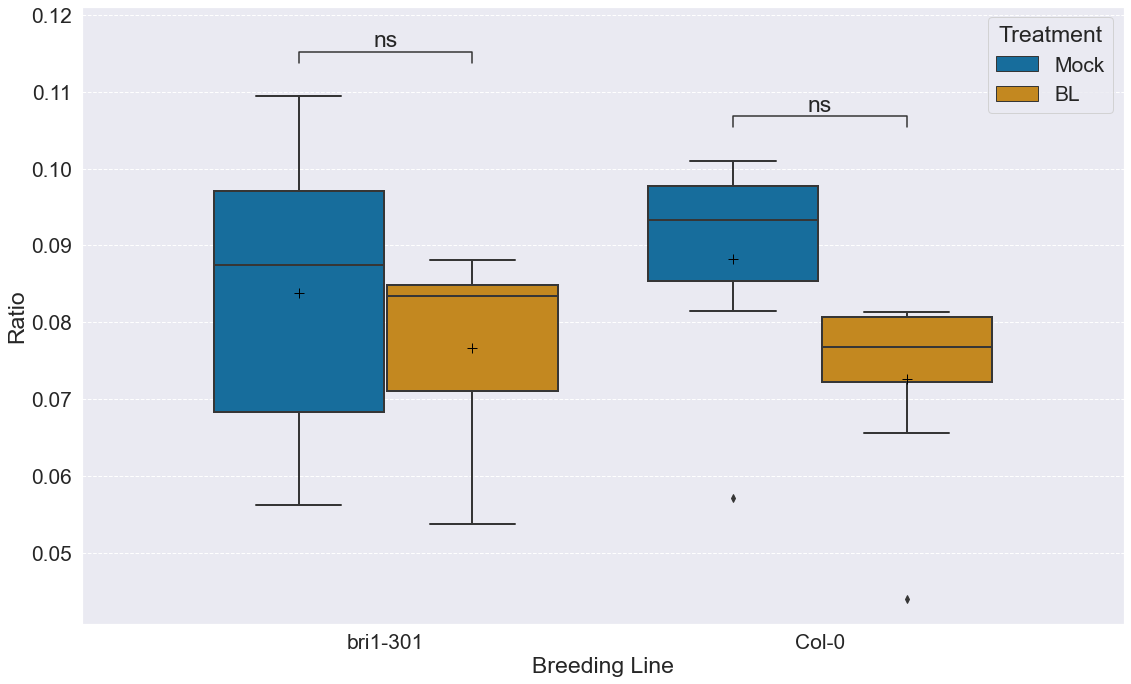

### Early Elongation Zone

Test Description     Test Name Statistic Symbol  \
0  Welch's t-test independent samples  t-test_welch                t   
1  Welch's t-test independent samples  t-test_welch                t   

      Value   p-value Corrected Significance Corrected Method  alpha  \
0  3.249650  0.024155                   None             None   0.05   
1  0.761403  0.462589                   None             None   0.05   

               Sample Comparison  
0        Col-0 Mock vs. Col-0 BL  
1  bri1-301 Mock vs. bri1-301 BL

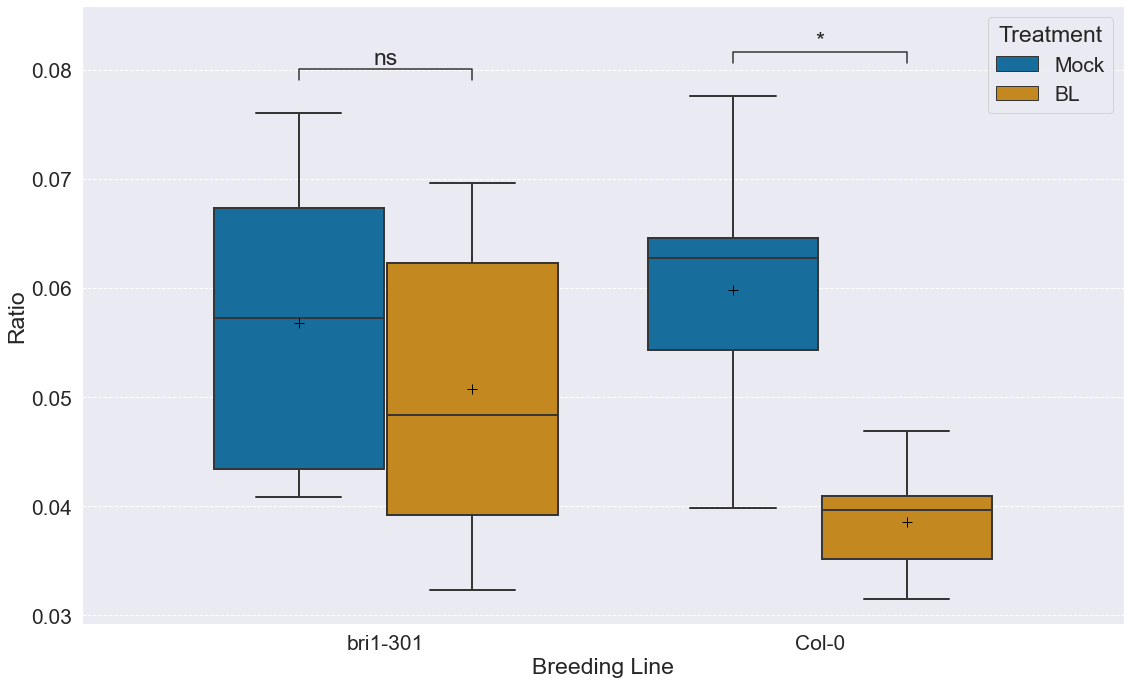

In [57]:
df = pd.read_csv(ratio_path, sep = '\t', header=0)
sns.set(style="darkgrid", font_scale=1.5, palette="colorblind",
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.rcParams["figure.figsize"] = (10 * 1.62, 10)  # (w, h)
output = "output"
font_options = {
    "axes.labelsize": 23,
    "font.size": 23,
    "legend.fontsize": 21,
    'legend.title_fontsize': 23,
    "xtick.labelsize": 21,
    "ytick.labelsize": 21,
}
plt.rcParams.update(font_options)
df = df.dropna()
product = set(itertools.product(df['Breeding Line'], df['Treatment']))
box_pairs = ([(a, b) for a, b in itertools.combinations(product, 2) if a[0] == b[0]])
os.makedirs(output, exist_ok=True)
for zone in df["Zone"].unique():
    ## test
    data = df[df["Zone"] == zone]
    ax = sns.boxplot(x="Breeding Line", y="Ratio", hue="Treatment",
                     data=data, showmeans=True, meanprops={"marker": "+",
                                                                             "markeredgecolor": "black",
                                                                             "markersize": "10"})
    annotator = Annotator(ax, box_pairs, data=data, x="Breeding Line", y="Ratio", hue="Treatment",verbose=False)
    display(Markdown(f"### {zone}"))
    annotator.configure(test='t-test_welch', show_test_name=False, text_format='star', loc='inside')
    annotator.apply_test()
    ax, test_results = annotator.annotate()
    dfs = pd.DataFrame()
    for res in test_results:
        dic = res.data.__dict__
        dfss = pd.DataFrame.from_dict(dic)
        dfss['comb'] = f"{dic['group1'][0]} {dic['group1'][1]} vs. {dic['group2'][0]} {dic['group2'][1]}"
        dfs = dfs.append(dfss.drop(0, axis=0), ignore_index=True)
    
    output_table = dfs.drop(['group1', 'group2'], axis=1)
    output_table.rename(columns={'test_description': 'Test Description',
                        'test_short_name': 'Test Name',
                        'stat_str': 'Statistic Symbol',
                        'stat_value': 'Value',
                        'pvalue': 'p-value',
                        '_corrected_significance': 'Corrected Significance',
                        '_correction_method': 'Corrected Method',
                        'alpha': 'alpha',
                        'comb': 'Sample Comparison'}, inplace=True)
    display(output_table)
    
    annotator.reset_configuration()
    plt.tight_layout()
    plt.show()
    plt.close()

## Ratio Values
-------------------

In [58]:
df.rename(columns={'Ratio': 'Average Ratio Value',
                   'Zone': 'Tissue Zone'}, inplace=True)
display(df)

Filename Treatment Breeding Line  Average Ratio Value  \
0    Image 70      Mock      bri1-301             0.056211   
1    Image 71      Mock      bri1-301             0.040823   
2    Image 72      Mock      bri1-301             0.063845   
3    Image 73      Mock      bri1-301             0.041183   
4    Image 74      Mock      bri1-301             0.081595   
5    Image 75      Mock      bri1-301             0.050204   
6    Image 76      Mock      bri1-301             0.093301   
7    Image 77      Mock      bri1-301             0.068330   
8    Image 78      Mock      bri1-301             0.109438   
9    Image 79      Mock      bri1-301             0.076030   
10   Image 80      Mock      bri1-301             0.098305   
11   Image 81      Mock      bri1-301             0.064421   
12  Image 114        BL      bri1-301             0.053745   
13  Image 115        BL      bri1-301             0.038340   
14  Image 116        BL      bri1-301             0.032290   
15  Image 117        BL      bri1-301             0.059000   
16  Image 118        BL      bri1-301             0.039498   
18  Image 120        BL      bri1-301             0.083382   
19  Image 121        BL      bri1-301             0.041158   
20  Image 122        BL      bri1-301             0.085854   
21  Image 123        BL      bri1-301             0.059981   
22  Image 124        BL      bri1-301             0.083046   
23  Image 125        BL      bri1-301             0.069666   
24  Image 126        BL      bri1-301             0.088103   
25  Image 127        BL      bri1-301             0.055579   
26  Image 128        BL      bri1-301             0.083815   
27  Image 129        BL      bri1-301             0.069392   
28   Image 58      Mock         Col-0             0.057078   
29   Image 59      Mock         Col-0             0.054291   
30   Image 60      Mock         Col-0             0.081496   
31   Image 61      Mock         Col-0             0.039842   
32   Image 62      Mock         Col-0             0.093338   
33   Image 63      Mock         Col-0             0.062808   
34   Image 64      Mock         Col-0             0.089159   
35   Image 65      Mock         Col-0             0.077626   
36   Image 66      Mock         Col-0             0.099879   
37   Image 67      Mock         Col-0             0.064615   
38   Image 68      Mock         Col-0             0.095628   
39   Image 69      Mock         Col-0             0.101050   
40  Image 100        BL         Col-0             0.065607   
41  Image 102        BL         Col-0             0.074497   
42  Image 104        BL         Col-0             0.081294   
43  Image 106        BL         Col-0             0.074490   
44  Image 108        BL         Col-0             0.081378   
45  Image 110        BL         Col-0             0.079134   
46  Image 112        BL         Col-0             0.080458   
47  Image 132        BL         Col-0             0.043962   
48  Image 133        BL         Col-0             0.031497   
49  Image 137        BL         Col-0             0.033588   
50  Image 138        BL         Col-0             0.036710   
51  Image 140        BL         Col-0             0.039633   
52  Image 142        BL         Col-0             0.046872   
53  Image 144        BL         Col-0             0.040358   
54  Image 146        BL         Col-0             0.041479   

              Tissue Zone  
0       Meristematic Zone  
1   Early Elongation Zone  
2       Meristematic Zone  
3   Early Elongation Zone  
4       Meristematic Zone  
5   Early Elongation Zone  
6       Meristematic Zone  
7   Early Elongation Zone  
8       Meristematic Zone  
9   Early Elongation Zone  
10      Meristematic Zone  
11  Early Elongation Zone  
12      Meristematic Zone  
13  Early Elongation Zone  
14  Early Elongation Zone  
15      Meristematic Zone  
16  Early Elongation Zone  
18      Meristematic Zone  
19  Early Elongation Zone  
20      Meristematic Zone  
21  Ea

## Image Ouput Visualization
------------------------------------

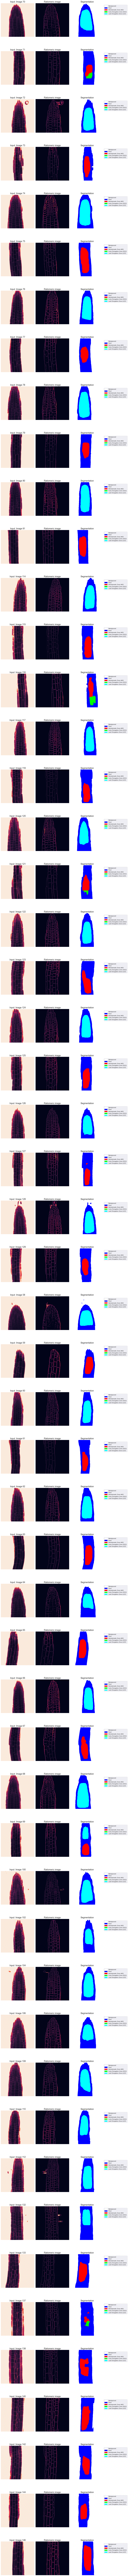

In [79]:
t = 1.0 #alpha
cmap = {0:[1.0, 1.0, 1.0, t],
        1:[0.0, 0.0, 1.0, t],
        2:[1.0, 0.0, 0.0, t],
        3:[0.0, 1.0, 0.0, t],
        4:[0.0, 1.0, 1.0, t]}
labels = {0:'Background',
          1:'Root',
          2:'Meristematic Zone (MZ)',
          3:'Early Elongation Zone (EEZ)',
          4:'Late Elongation Zone (LEZ)'}
patches =[mpatches.Patch(color=cmap[i],label=labels[i]) for i in cmap]

fig, axs = plt.subplots(len(df["Filename"]), 3, figsize=(15, 300))
for idx, file in enumerate(df["Filename"]):
    
    #img = plt.imread(f"{img_path}{file}.tif")
    #ratio_img = plt.imread(f"{ratio_img_path}{file}_ratio.tif")
    #pred_img = np.load(f"{pred_path}{file}.npy")
    
    img = tiff.imread(f"{ome_output_path}{file}.ome.tif")
    
    axs[idx][0].set_axis_off()
    axs[idx][0].imshow(img[0])
    axs[idx][0].set_title("Input: " + file)
    
    axs[idx][1].set_axis_off()
    axs[idx][1].imshow(img[1])
    axs[idx][1].set_title("Ratiomeric image")
    
    axs[idx][2].set_axis_off()
    label_img = np.array([[cmap[i] for i in j] for j in img[2]])
    axs[idx][2].imshow(label_img)
    axs[idx][2].set_title("Segmentation")
    axs[idx][2].legend(handles=patches, loc='center left', bbox_to_anchor=(1.0, 0.8), borderaxespad=0., fontsize=12)

fig.tight_layout()